# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing (star). 
* canton: swiss canton.
* class_level: school year in swiss system.
* study: boolean variable. True if the student participated in the study.
* class_id: identifier of student’s class (only for the students in the experiment)


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* event_date: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).

### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* solution: solution to question.
* type: type of question that was answered. 
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).
* challenge: (boolean) whether the transaction was part of a challenge or not. Professors can create challenges containing different documents
* challenge_id: unique identifier of challenges. The same challenge can be done by multiple students. The pre-test and post-test in the study were designed like challenges.
* challenge_order: within the challenge, the order of the questions. The order matters because sometimes the questions were adapted depending on the student’s knowledge.
* challenge_name: name given to the challenges. 

## Useful Metadata Files
* [Data description](https://docs.google.com/document/d/1NPFNwi79JddrxZM-CpltH5nHro5btHRSNnYcAGj7Y0A/edit?usp=sharing)


In [ ]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
from scipy.stats import skewnorm, chi2_contingency


In [ ]:
DATA_DIR = '../../data/'

users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

In [ ]:
transactions.head()

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,...,type,session_id,topic_id,session_closed,session_type,session_accepted,challenge,challenge_id,challenge_order,challenge_name
0,688413,88fdcaad-f73b-46a2-b561-d262f2441442,393211,awd0i1DlVtg6kuMZSkpmHa,75002,PARTIAL,"{""type"": ""MULTI_COLOR_HIGHLIGHT"", ""highlighted...",2021-05-21 07:58:27.312000000,2021-05-21 08:03:43.020000000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,MULTI_COLOR_HIGHLIGHT,NaN,NaN,NaN,NaN,NaN,True,1083.0,2.0,G3h – Training Rhetorik
1,688414,a75eb7b4-b2c2-47d4-9200-27980c175037,393211,arhWF3BT53V9W8cGOaZVPX,75012,PARTIAL,"{""type"": ""MULTI_COLOR_HIGHLIGHT"", ""highlighted...",2021-05-21 08:04:05.067000000,2021-05-21 08:07:21.288999936,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,MULTI_COLOR_HIGHLIGHT,NaN,NaN,NaN,NaN,NaN,True,1083.0,3.0,G3h – Training Rhetorik
2,688415,61eb829d-bdda-4107-86af-ad9a14a7bdc9,393211,9wk5dtV2mF59odW0wCEYYc,75003,PARTIAL,"{""type"": ""CLOZE_TEXT"", ""clozeInputs"": [""Person...",2021-05-21 08:07:37.048000000,2021-05-21 08:13:30.953999872,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,CLOZE_TEXT,NaN,NaN,NaN,NaN,NaN,True,1083.0,4.0,G3h – Training Rhetorik
3,688416,30ff0d8a-865d-460b-9177-b698a52b0d5c,393211,afilxZ8LycP5LReULeKngW,75009,CORRECT,"{""type"": ""DND_PAIRS"", ""input"": [""<p>Ich gehe i...",2021-05-21 08:13:38.943000000,2021-05-21 08:22:13.975000064,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,DND_PAIRS,NaN,NaN,NaN,NaN,NaN,True,1083.0,5.0,G3h – Training Rhetorik
4,688417,0adedf3b-ba35-4497-8c6b-b5c2f6fcbbf3,393211,76m6v05NCeX8x2Wr5tKRE3,75007,CORRECT,"{""type"": ""DND_PAIRS"", ""input"": [""<p>Kleiner Ma...",2021-05-21 08:22:19.391000000,2021-05-21 08:22:55.366000128,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,DND_PAIRS,NaN,NaN,NaN,NaN,NaN,True,1083.0,6.0,G3h – Training Rhetorik


In [ ]:
# Find the unique values in gender column in users table
print(users.gender.unique())
# Find how many NaN in users gender
print(users.gender.isnull().sum())

[nan 'MALE' 'FEMALE' 'STAR']
4217


In [ ]:
# check if any user id belongs to more than one user
print(users.user_id.duplicated().sum())

0


In [ ]:
events.action.value_counts()

PAGE_VISIT              2113982
REVIEW_TASK             1734632
SUBMIT_ANSWER           1404142
NAVIGATE_DASHBOARD      1093791
NEXT                     907521
WINDOW_VISIBLE_FALSE     851634
WINDOW_VISIBLE_TRUE      705679
VIEW_QUESTION            451981
OPEN_FEEDBACK            281632
CLOSE_FEEDBACK           251044
GO_TO_THEORY             211418
SUBMIT_SEARCH            162067
VIEW_SESSION_END         159925
SKIP                     158420
WINDOW_OPEN              150781
CLOSE                    131124
WINDOW_CLOSE             122121
LOGIN                    105144
SURVEY_BANNER             68655
SELECT_STATISTICS         57119
ACCEPT_PROGRESS           30996
GO_TO_COMMENTS            12158
GO_TO_BUG_REPORT           9772
LOGOUT                     6821
SHARE_SESSION              3320
REJECT_PROGRESS            3257
PRETEST                    1709
NAVIGATE_SURVEY            1111
GO_TO_SESSION               563
REQUEST_HINT                562
SHARE                        90
Name: ac

In [ ]:
events.event_type.value_counts()

VIEW     6858450
CLICK    4334721
Name: event_type, dtype: int64

In [ ]:
transactions.type.value_counts()

MULTIPLE_CHOICE          306214
CLOZE_TEXT_DROPDOWN      263906
CLOZE_TEXT               202705
SOLUTION_FIELD            83532
CLOZE_MATH                79525
MULTI_COLOR_HIGHLIGHT     69995
DND_PAIRS                 68789
FIX_TEXT                  65704
HIGHLIGHT                 64941
MATH_STEP_BY_STEP         61179
DND_GROUP                 44102
SEPARATE_TEXT             20015
DND_ORDER                 16938
DND_IN_TEXT               16534
GRAPH_SELECT_SHAPE        12298
GRAPH_SOLUTION_FIELD      11003
OPEN_TASK                  9956
GRAPH_CLICK_POINTS         4196
Name: type, dtype: int64

In [ ]:
go_to_theory = events[events.action == 'GO_TO_THEORY'].groupby('user_id').action.count().sort_values(ascending=False)
go_to_theory.describe()

count    11565.000000
mean        18.280847
std         53.223441
min          1.000000
25%          2.000000
50%          6.000000
75%         16.000000
max       3000.000000
Name: action, dtype: float64

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the data set?


In [ ]:
# ## Users table
# * user_id: unique identifier of user in database.
# * gender: only three values: M male, F female or missing (star). 
# * canton: swiss canton.
# * class_level: school year in swiss system.
# * study: boolean variable. True if the student participated in the study.
# * class_id: identifier of student’s class (only for the students in the experiment)

print(users.user_id.nunique())
print(users.user_id.count())
# both results are the same because there are no duplicated user_id

30929
30929


#### b) How many transactions were done per user? Please provide a visualization and discuss the distribution.

<AxesSubplot:xlabel='user_id'>

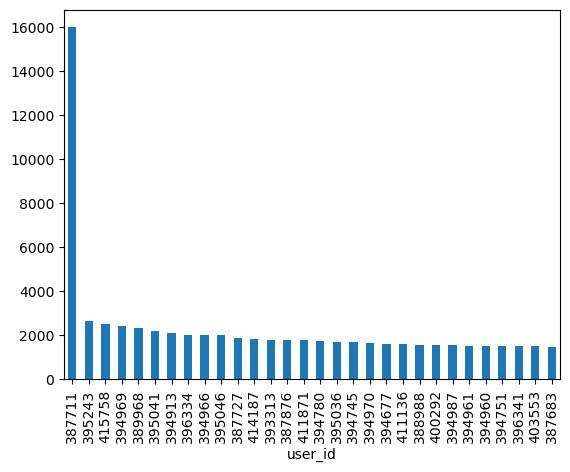

In [ ]:
# ## Transactions Table
# * transaction_id: unique identifier of transaction in database.
# * transaction_token: used to link to events table.
# * user_id: user who performed the transaction.
# * document_id: document that was answered in transaction.
# * document_version: version of document that was answered.
# * evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
# * input: answer the user gave.
# * start_time: timestamp of when the user started answering.
# * commit_time: timestamp of when the user submitted the answer.
# * user_agent: the browser that the user used.
# * solution: solution to question.
# * type: type of question that was answered. 
# * session_id: session during which the event took place.
# * topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
# * session_closed: whether the session has been finished (1: finished; 0: not finished).
# * session_type: whether the session is a learn or level check (1: learn; 2: level check).
# * session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).
# * challenge: (boolean) whether the transaction was part of a challenge or not. Professors can create challenges containing different documents
# * challenge_id: unique identifier of challenges. The same challenge can be done by multiple students. The pre-test and post-test in the study were designed like challenges.
# * challenge_order: within the challenge, the order of the questions. The order matters because sometimes the questions were adapted depending on the student’s knowledge.
# * challenge_name: name given to the challenges. 

transactions.groupby('user_id').transaction_id.count().sort_values(ascending=False).head(10)
transactions.groupby('user_id').transaction_id.count().sort_values(ascending=False).head(30).plot(kind='bar')

Clearly one user(387711) is a lot more active compared to others, this could be very well an admin account of some sorts, testing the platform. (possibly)


#### c) Which are the 10 most popular event actions? Please provide a visualization of the frequency of the top 10 event actions.

Hint: See actions in table events.

<AxesSubplot:xlabel='action'>

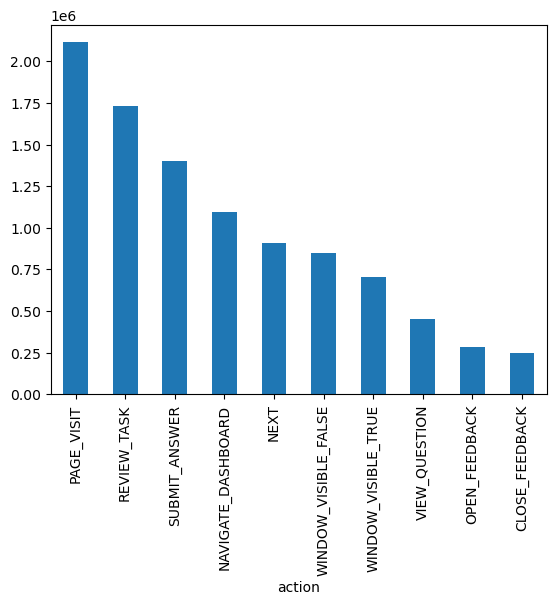

In [ ]:
# ## Events Table
# * event_id: unique identifier of event in database.
# * user_id: user who peformed the event.
# * event_date: timestamp of event.
# * category: classification of action (task, general, statistics, etc).
# * action: type of action performed.
# * event_type: whether the students viewed or clicked in the event.
# * transaction_token: used to link to transactions table.
# * tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).
# * session_id: session during which the event took place.
# * topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
# * session_closed: whether the session has been finished (1: finished; 0: not finished).
# * session_type: whether the session is a learn or level check (1: learn; 2: level check).
# * session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).

# Find the most popular event actions
events.groupby('action').action.count().sort_values(ascending=False).head(10)
# Provide visualization of the frequency of most popular event actions
events.groupby('action').action.count().sort_values(ascending=False).head(10).plot(kind='bar')

It should be no surprise that the most popular action is the page visit action. 

The surprising find in here is that SUBMIT_TASK action is a lot more frequent compared to VIEW_QUESTION action. This (most likely) means that for the same question the users on average submit multiple attempts.

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered (hint: action event = submit answer)

- **num_events**: total number of events of the student (hint: in events table)  

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_reading**: total number of theory reading events  (hint: action event = go to theory)

In [ ]:
# check if there are any duplicated transaction tokens
print(transactions.transaction_token.duplicated(keep=False).sum())

0


In [ ]:
# Notice that transaction token is unique in transactions table but not in events table
events.transaction_token.duplicated().sum()

9102670

In [ ]:
# does it become unique if we just consider action = 'SUBMIT_ANSWER'?
events_submit_ans = events[events.action == 'SUBMIT_ANSWER']
events_submit_ans = events_submit_ans[events_submit_ans.transaction_token.duplicated()]
events_submit_ans.head(10)
# as can be seen below, there are still duplicated transaction tokens, 

,event_id,user_id,event_date,category,action,event_type,transaction_token,tracking_data,session_id,topic_id,session_closed,session_type,session_accepted
2979,3261,388487,2021-05-23 09:42:09.652,TASK,SUBMIT_ANSWER,CLICK,b956c3d6-bf6a-42a8-acfd-2e5dcabb8642,NaN,34555.0,1007.0,1.0,1.0,1.0
2980,3262,388487,2021-05-23 09:42:13.244,TASK,SUBMIT_ANSWER,CLICK,b956c3d6-bf6a-42a8-acfd-2e5dcabb8642,NaN,34555.0,1007.0,1.0,1.0,1.0
2981,3263,388487,2021-05-23 09:42:15.194,TASK,SUBMIT_ANSWER,CLICK,b956c3d6-bf6a-42a8-acfd-2e5dcabb8642,NaN,34555.0,1007.0,1.0,1.0,1.0
2982,3264,388487,2021-05-23 09:42:34.471,TASK,SUBMIT_ANSWER,CLICK,b956c3d6-bf6a-42a8-acfd-2e5dcabb8642,NaN,34555.0,1007.0,1.0,1.0,1.0
2983,3265,388487,2021-05-23 09:42:36.972,TASK,SUBMIT_ANSWER,CLICK,b956c3d6-bf6a-42a8-acfd-2e5dcabb8642,NaN,34555.0,1007.0,1.0,1.0,1.0
2984,3266,388487,2021-05-23 09:42:38.103,TASK,SUBMIT_ANSWER,CLICK,b956c3d6-bf6a-42a8-acfd-2e5dcabb8642,NaN,34555.0,1007.0,1.0,1.0,1.0
2985,3267,388487,2021-05-23 09:43:05.609,TASK,SUBMIT_ANSWER,CLICK,b956c3d6-bf6a-42a8-acfd-2e5dcabb8642,NaN,34555.0,1007.0,1.0,1.0,1.0
2986,3268,388487,2021-05-23 09:43:07.700,TASK,SUBMIT_ANSWER,CLICK,b956c3d6-bf6a-42a8-acfd-2e5dcabb8642,NaN,34555.0,1007.0,1.0,1.0,1.0
3002,3284,388487,2021-05-23 09:45:47.132,TASK,SUBMIT_ANSWER,CLICK,3aa8821b-4c9c-4122-9c5b-d98324909382,NaN,34557.0,1007.0,1.0,1.0,1.0
3008,3290,388487,2021-05-23 09:46:47.966,TASK,SUBMIT_ANSWER,CLICK,ee9a28ca-f77a-4ae9-83b3-9c2bc7a8a8d5,NaN,34558.0,1007.0,1.0,1.0,1.0


In [ ]:
# Build a data frame containing one row per user using the 3 dataframes already loaded
# Each row will be of form: user_id, gender, num_events, num_questions, percentage_correct, num_reading
# The features are defined as follows:
# num_questions: total number of questions the student answered(hint: action event=submit answer)
# num_events: total number of events of the student(hint: in events table)
# percentage_correct: number of correct answers/total number of answers(hint: evaluation=correct). If desired, you may assign a weight of 0.5 to partially correct answers.
# num_reading: total number of theory reading events(hint: action event=go to theory)

# first create copy of three dataframes with only the columns we need
new_users = users[['user_id', 'gender']]
new_transactions = transactions[['transaction_token', 'evaluation']]
new_events = events[['event_id', 'user_id', 'transaction_token', 'action']]

In [ ]:
# Merge the users and transactions tables
users_events = pd.merge(
    new_users, new_events, on='user_id', how='left')
print(users_events.shape)

(11201630, 5)


In [ ]:
# Merge the users_events and transactions tables
users_transactions_events = pd.merge(
    users_events, new_transactions, on='transaction_token', how='left')
print(users_transactions_events.shape)
users_transactions_events.head(10)

(11201630, 6)


,user_id,gender,event_id,transaction_token,action,evaluation
0,387604,NaN,3208.0,09afa151-ee87-4dbe-bb9e-7bef6b92102d,VIEW_QUESTION,NaN
1,387604,NaN,12285.0,65e13251-bb45-4352-8e84-e06943eabe57,VIEW_QUESTION,NaN
2,387604,NaN,46712.0,NaN,LOGIN,NaN
3,387604,NaN,46713.0,01913d53-3d5a-492d-b59f-3cdc4828e098,VIEW_QUESTION,NaN
4,387604,NaN,46714.0,NaN,NAVIGATE_DASHBOARD,NaN
5,387604,NaN,46715.0,01913d53-3d5a-492d-b59f-3cdc4828e098,VIEW_QUESTION,NaN
6,387604,NaN,46716.0,NaN,NAVIGATE_DASHBOARD,NaN
7,387604,NaN,46717.0,01913d53-3d5a-492d-b59f-3cdc4828e098,VIEW_QUESTION,NaN
8,387604,NaN,46718.0,NaN,NAVIGATE_DASHBOARD,NaN
9,387604,NaN,60148.0,NaN,NAVIGATE_DASHBOARD,NaN


In [ ]:
# Find the number of events for each user
num_events = users_transactions_events.groupby('user_id').event_id.count()
num_events.sort_values(ascending=False).head(10)

user_id
393686    16056
387763    15306
395243    13167
389968    13063
396334    10692
409887    10223
390316    10076
411136     9599
394970     9486
395046     9439
Name: event_id, dtype: int64

In [ ]:
# Notice there are users with 0 number of events
# Some examples:
num_events[num_events == 0].head(10)

user_id
387686    0
387700    0
387701    0
387702    0
387703    0
387704    0
387705    0
387707    0
387708    0
387709    0
Name: event_id, dtype: int64

In [ ]:
# Find the number of questions for each user
# drop all rows except those with action = 'SUBMIT_ANSWER'
temp = users_transactions_events[users_transactions_events.action == 'SUBMIT_ANSWER']
# remove duplicate transaction tokens
# temp = temp.drop_duplicates(subset='transaction_token')
# drop rows with evaluation = NaN
temp = temp.dropna(subset=['evaluation'])
# count the number of rows for each user
num_questions = temp.groupby('user_id').action.count()
num_questions.sort_values(ascending=False).head(10)

user_id
415758    1653
387727    1534
394969    1498
394966    1453
395046    1451
395041    1409
411136    1406
395243    1269
396334    1251
394780    1215
Name: action, dtype: int64

In [ ]:
# Find the number of correct answers for each user
num_correct = temp[temp.evaluation == 'CORRECT'].groupby(
    'user_id').evaluation.count()
num_correct.sort_values(ascending=False).head(10)

user_id
415758    948
394969    868
387727    852
395041    831
395243    779
396334    744
396341    737
395046    720
414187    712
394780    679
Name: evaluation, dtype: int64

In [ ]:
# Find the number of partially correct answers for each user
num_partially_correct = temp[temp.evaluation == 'PARTIAL'].groupby(
    'user_id').evaluation.count()
num_partially_correct.sort_values(ascending=False).head(10)

user_id
394966    775
411136    700
414162    645
394987    640
415758    627
395046    607
394675    598
394761    594
394686    567
395039    563
Name: evaluation, dtype: int64

In [ ]:
# Find the number of theory reading events for each user,
# drop all rows except those with action = 'GO_TO_THEORY'
temp = users_transactions_events[users_transactions_events.action == 'GO_TO_THEORY']
# remove duplicate transaction tokens
#temp = temp.drop_duplicates(subset='transaction_token')
# count the number of rows for each user
num_reading = temp.groupby('user_id').action.count()
num_reading.sort_values(ascending=False).head(10)

user_id
393686    3000
390316    1528
411071    1154
387763    1136
387668     945
394171     845
388060     800
387604     677
410688     619
402665     576
Name: action, dtype: int64

In [ ]:
# Create a new dataframe with the desired features
df = pd.DataFrame({'num_events': num_events, 'num_questions': num_questions, 'num_correct': num_correct, 'num_partially_correct': num_partially_correct, 'num_reading': num_reading})
df['num_partially_correct'].fillna(0, inplace=True)
df['num_correct'].fillna(0, inplace=True)
# Calculate the percentage of correct answers
df['percentage_correct'] = (df['num_correct'] + 0.5 * df['num_partially_correct']) / df['num_questions']
# Drop the columns num_correct and num_partially_correct
df = df.drop(['num_correct', 'num_partially_correct'], axis=1)
# Fill the NaN values with 0
df_without_fill = df.copy()
df = df.fillna(0)

In [ ]:
# now add the gender column
new_users = users[['user_id', 'gender']]
df = pd.merge(df, new_users, on='user_id', how='left')
# replace the NaN gender values with 'unknown'
df.gender = df.gender.fillna('unknown')

In [ ]:
df_without_fill.head(10)

,num_events,num_questions,num_reading,percentage_correct
user_id,,,,
387604,5087,360.0,677.0,0.694444
387605,3604,238.0,35.0,0.573529
387608,2359,114.0,58.0,0.850877
387613,213,4.0,7.0,1.000000
387615,535,14.0,18.0,0.821429
387643,1053,84.0,31.0,0.821429
387644,3113,146.0,479.0,0.845890
387650,4211,63.0,24.0,0.674603
387655,19,NaN,NaN,NaN


In [ ]:
df.head(10)

,user_id,num_events,num_questions,num_reading,percentage_correct,gender
0,387604,5087,360.0,677.0,0.694444,unknown
1,387605,3604,238.0,35.0,0.573529,unknown
2,387608,2359,114.0,58.0,0.850877,unknown
3,387613,213,4.0,7.0,1.000000,unknown
4,387615,535,14.0,18.0,0.821429,MALE
5,387643,1053,84.0,31.0,0.821429,unknown
6,387644,3113,146.0,479.0,0.845890,unknown
7,387650,4211,63.0,24.0,0.674603,unknown
8,387655,19,0.0,0.0,0.000000,FEMALE
9,387666,2016,200.0,34.0,0.587500,MALE


In [ ]:
df[df.num_events == 0].head(10)

,user_id,num_events,num_questions,num_reading,percentage_correct,gender
27,387686,0,0.0,0.0,0.0,unknown
28,387700,0,0.0,0.0,0.0,unknown
29,387701,0,0.0,0.0,0.0,unknown
30,387702,0,0.0,0.0,0.0,unknown
31,387703,0,0.0,0.0,0.0,unknown
32,387704,0,0.0,0.0,0.0,unknown
33,387705,0,0.0,0.0,0.0,unknown
35,387707,0,0.0,0.0,0.0,unknown
36,387708,0,0.0,0.0,0.0,unknown
37,387709,0,0.0,0.0,0.0,unknown


In [ ]:
# check if any user id is duplicated
df.user_id.duplicated().sum()
# all seems to be fine

0

In [ ]:
df.user_id.nunique() # And we have all the users. Great!

30929

b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_events, num_questions, percentage_correct, num_reading) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [ ]:
# df describe all columns except user id
df[df.columns[1:]].describe()

,num_events,num_questions,num_reading,percentage_correct
count,30929.000000,30929.000000,30929.000000,30929.000000
mean,361.898897,45.305765,6.835591,0.454084
std,709.224347,96.452024,33.725347,0.326415
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,136.000000,13.000000,0.000000,0.593750
75%,402.000000,49.000000,3.000000,0.700000
max,16056.000000,1653.000000,3000.000000,1.000000


In [ ]:
df_without_fill.describe()

,num_events,num_questions,num_reading,percentage_correct
count,30929.000000,21433.000000,11565.000000,21433.000000
mean,361.898897,65.378715,18.280847,0.655269
std,709.224347,110.056889,53.223441,0.148052
min,0.000000,1.000000,1.000000,0.000000
25%,0.000000,11.000000,2.000000,0.583333
50%,136.000000,30.000000,6.000000,0.662500
75%,402.000000,71.000000,16.000000,0.743363
max,16056.000000,1653.000000,3000.000000,1.000000


In [ ]:
continuous_cols = df._get_numeric_data().columns
print(continuous_cols)

Index(['user_id', 'num_events', 'num_questions', 'num_reading',
       'percentage_correct'],
      dtype='object')


In [ ]:
categorical_cols = list(set(df.columns) - set(continuous_cols))
print(categorical_cols)

['gender']


In [ ]:
df_copy = df.copy()
# drop user_id column, as there is no need to visualize it
# df_copy = df_copy[df_copy.num_events != 0]
df_copy = df_copy.drop('user_id', axis=1)

0 percentage_correct True
1 gender False


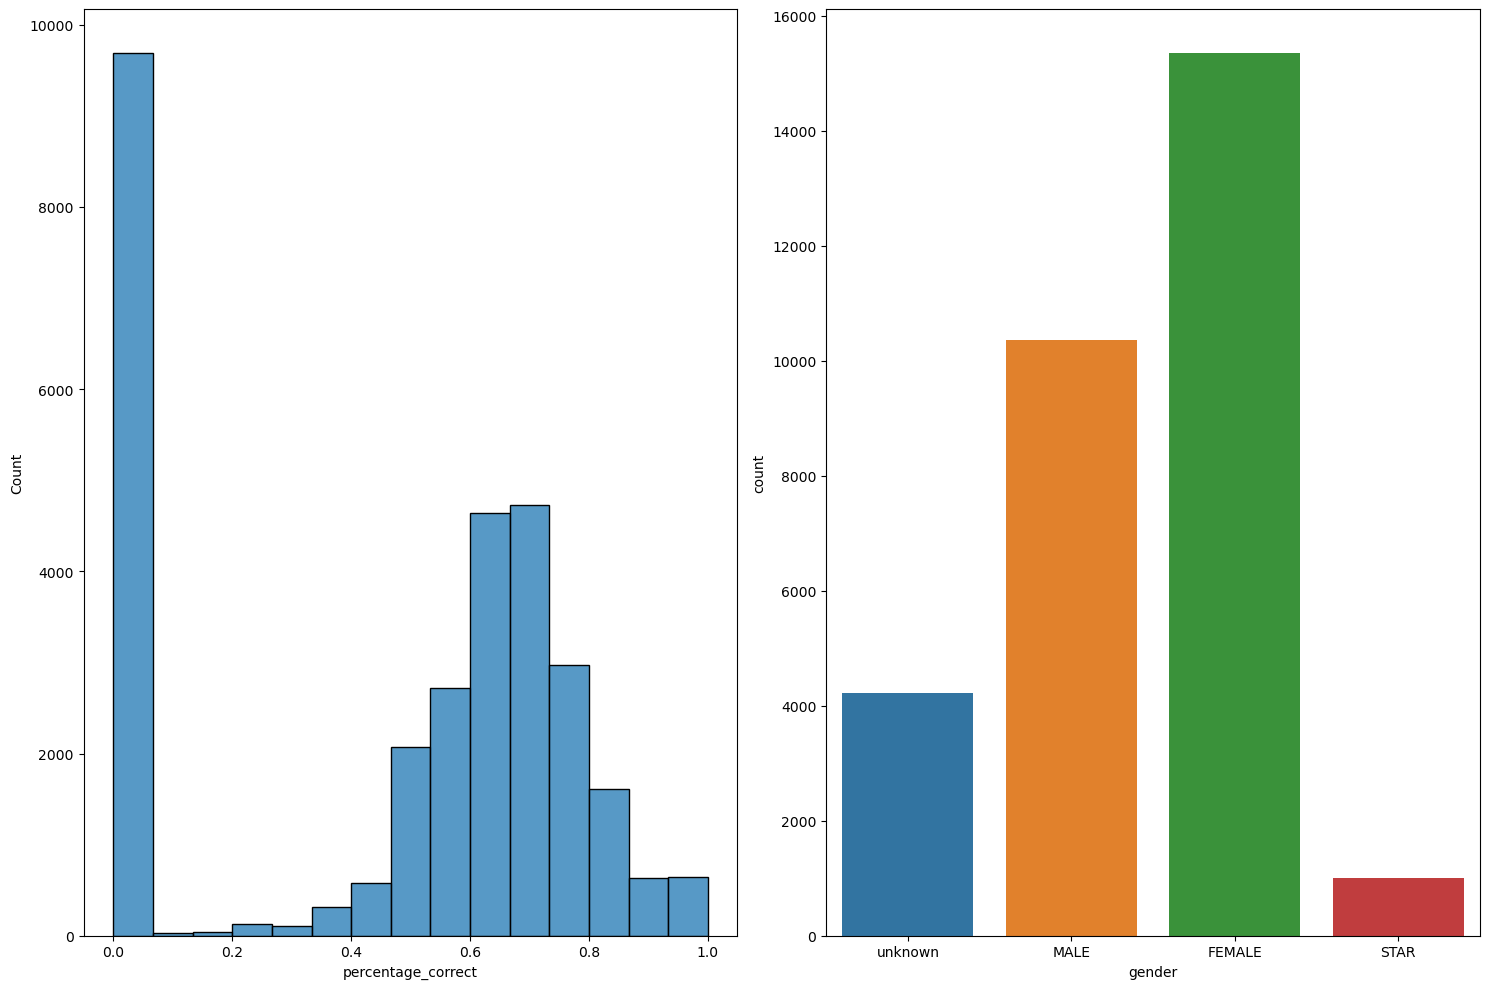

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
for i, col in enumerate(['percentage_correct', 'gender']):
    print(i,col, col in continuous_cols)
    ax = axes[i % 2]
    if col in continuous_cols:
        sns.histplot(data=df_copy[col], bins=15, ax=ax)
    else:
        # plot the categorical features
        sns.countplot(data=df_copy, x=col, ax=ax)
fig.tight_layout()
plt.show()


In [ ]:
# check how many users have percentage_correct = 0 
df_copy[df_copy.percentage_correct == 0].shape[0]

9686

In [ ]:
df_copy[df_copy.num_questions == 0].shape[0]

9496

In [ ]:
df[(df.num_questions > 0) & (df.percentage_correct == 0)].shape[0] # Has answered questions but has not answered any correctly

190

In [ ]:
df[df.num_events == 0].shape[0] # Has not done any events

8459

In [ ]:
df[(df.num_questions == 0) & (df.num_events > 0)].shape[0] # Has done events but has not answered any questions

1037

In [ ]:
df[(df.num_questions == 0) & (df.num_events > 0)].shape[0] + df[df.num_events == 0].shape[0] +  df[(df.num_questions > 0) & (df.percentage_correct == 0)].shape[0]
# The total number of users who have 0% correct answers are:
# Users who have not answered any questions but has done other events: 1037
# Users who have not done any events: 8459
# Users who have answered questions but has not answered any correctly: 190

9686

We can clearly see that Percentage_correct follows a gaussian distribution except for the part at 0.0. We can see that this is because of the fillna function we have previously called, because checking the describe function of both df and df_without_fill we can see that for the df variable the percentage correct column has 30929 many non NaN rows, but df_without_fill has 21433 many rows and notice below that it gives 9496. Which is the large portion of the 0% correct answers

**Checking the analysis above we can clearly see that the users who have answered questions but have 0% correct are in reality a really small minority(only 190). So the 9496 of the 9686 are just users who have not interacted with the problems at all.**

0 num_events True 8459
1 num_questions True 9496
2 num_reading True 19364


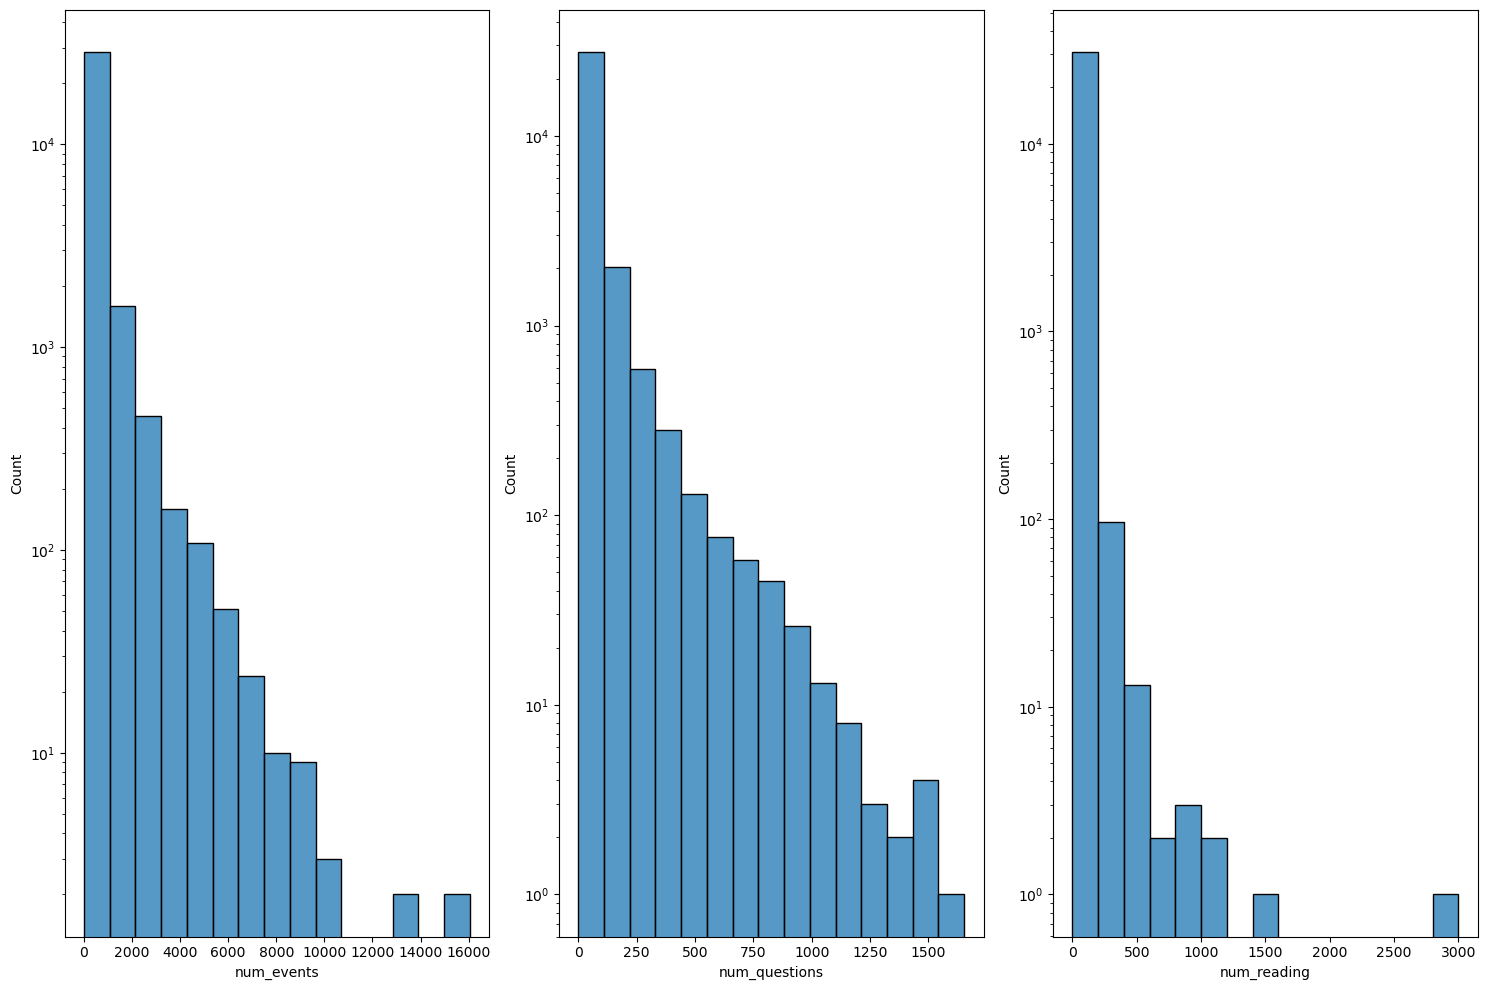

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
# drop rows with 0 events
for i, col in enumerate(['num_events', 'num_questions', 'num_reading']):
    print(i,col, col in continuous_cols, df_copy[df_copy[col]==0].shape[0])
    ax = axes[i % 3]
    ax.set_yscale('log')
    sns.histplot(data=df_copy[col], bins=15, ax=ax)
fig.tight_layout()
plt.show()

In [ ]:
# Count the number of users who have num_events between 10000 and 20000
df_copy[(df_copy.num_events >= 0) & (df_copy.num_events < 2000)].shape[0]

29995

In [ ]:
df.num_events.sort_values(ascending=False).head(20)

4985     16056
88       15306
6271     13167
1897     13063
7201     10692
17332    10223
2220     10076
18328     9599
6050      9486
6116      9439
6046      9423
54        9067
21795     8893
5873      8697
1062      8683
6067      8565
5780      8507
6049      8392
5996      8249
12937     8113
Name: num_events, dtype: int64

Most of the users for these 3 features seem to be concentrated around the 0 mark.

num_events = 0: 8459

num_questions = 0: 9496

num_reading = 0: 19364



c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

In [ ]:
# in the events table for each user find the count of action='WINDOW_VISIBLE_FALSE'
# and action='WINDOW_VISIBLE_TRUE'
# and then calculate the ratio of WINDOW_VISIBLE_TRUE / (WINDOW_VISIBLE_TRUE + WINDOW_VISIBLE_FALSE)

# drop all rows except those with action = 'WINDOW_VISIBLE_FALSE'
temp = users_transactions_events[users_transactions_events.action == 'WINDOW_VISIBLE_FALSE']

# count the number of rows for each user
num_window_visible_false = temp.groupby('user_id').action.count()
# fill the missing user ids with 0
num_window_visible_false = num_window_visible_false.to_frame().reindex(users.user_id).fillna(0).reset_index()


In [ ]:
# drop all rows except those with action = 'WINDOW_VISIBLE_TRUE'
temp = users_transactions_events[users_transactions_events.action == 'WINDOW_VISIBLE_TRUE']

# count the number of rows for each user
num_window_visible_true = temp.groupby('user_id').action.count()
# fill the missing user ids with 0
num_window_visible_true = num_window_visible_true.to_frame().reindex(users.user_id).fillna(0).reset_index()


In [ ]:
print(num_window_visible_false.shape)
print(num_window_visible_true.shape)

(30929, 2)
(30929, 2)


In [ ]:
# Create a new dataframe with 2 columns: user_id and the ratio
df_window_visible = pd.DataFrame({'user_id': num_window_visible_true.user_id, 'ratio_window_visible': num_window_visible_true.action / (num_window_visible_true.action + num_window_visible_false.action)})

# merge the new dataframe with the main dataframe
df = pd.merge(df, df_window_visible, on='user_id', how='left')

In [ ]:
df

,user_id,num_events,num_questions,num_reading,percentage_correct,gender,ratio_window_visible
0,387604,5087,360.0,677.0,0.694444,unknown,0.408915
1,387605,3604,238.0,35.0,0.573529,unknown,0.389630
2,387608,2359,114.0,58.0,0.850877,unknown,0.398515
3,387613,213,4.0,7.0,1.000000,unknown,0.471698
4,387615,535,14.0,18.0,0.821429,MALE,0.343434
...,...,...,...,...,...,...,...
30924,432018,0,0.0,0.0,0.000000,MALE,NaN
30925,432020,117,7.0,6.0,0.714286,MALE,0.400000
30926,432021,0,0.0,0.0,0.000000,FEMALE,NaN
30927,432022,0,0.0,0.0,0.000000,FEMALE,NaN


In [ ]:
events[events.action == 'REVIEW_TASK'].action.count() / events.shape[0] # Only 15.4% of the events are OPEN_FEEDBACK

0.1549723487651533

In [ ]:
# in the events table for each user find the count of action='REVIEW_TASK'

# drop all rows except those with action = 'OPEN_FEEDBACK'
temp = users_transactions_events[users_transactions_events.action == 'REVIEW_TASK']
# count the number of rows for each user
num_review_task = temp.groupby('user_id').action.count()
num_review_task = num_review_task.to_frame().reindex(users.user_id).fillna(0)
num_review_task.shape

(30929, 1)

In [ ]:
df = pd.merge(df, num_review_task, on='user_id', how='left')

In [ ]:
# rename action column to num_review_task
df = df.rename(columns={'action': 'num_review_task'})

In [ ]:
df

,user_id,num_events,num_questions,num_reading,percentage_correct,gender,ratio_window_visible,num_open_feedback,num_review_task
0,387604,5087,360.0,677.0,0.694444,unknown,0.408915,46.0,481.0
1,387605,3604,238.0,35.0,0.573529,unknown,0.389630,78.0,342.0
2,387608,2359,114.0,58.0,0.850877,unknown,0.398515,11.0,183.0
3,387613,213,4.0,7.0,1.000000,unknown,0.471698,0.0,16.0
4,387615,535,14.0,18.0,0.821429,MALE,0.343434,1.0,25.0
...,...,...,...,...,...,...,...,...,...
30924,432018,0,0.0,0.0,0.000000,MALE,NaN,0.0,0.0
30925,432020,117,7.0,6.0,0.714286,MALE,0.400000,4.0,12.0
30926,432021,0,0.0,0.0,0.000000,FEMALE,NaN,0.0,0.0
30927,432022,0,0.0,0.0,0.000000,FEMALE,NaN,0.0,0.0


*Your feature descriptions and arguments/hypotheses go here*

d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [ ]:
df.describe()

,user_id,num_events,num_questions,num_reading,percentage_correct,ratio_window_visible,num_open_feedback,num_review_task
count,30929.000000,30929.000000,30929.000000,30929.000000,30929.000000,21857.000000,30929.000000,30929.000000
mean,407965.363704,361.898897,45.305765,6.835591,0.454084,0.412730,9.105758,56.084322
std,12671.651629,709.224347,96.452024,33.725347,0.326415,0.099550,30.497469,114.628265
min,387604.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,396919.000000,0.000000,0.000000,0.000000,0.000000,0.392857,0.000000,0.000000
50%,407405.000000,136.000000,13.000000,0.000000,0.593750,0.440000,0.000000,18.000000
75%,417594.000000,402.000000,49.000000,3.000000,0.700000,0.469697,5.000000,61.000000
max,432023.000000,16056.000000,1653.000000,3000.000000,1.000000,1.000000,647.000000,2487.000000


<AxesSubplot:xlabel='ratio_window_visible', ylabel='Count'>

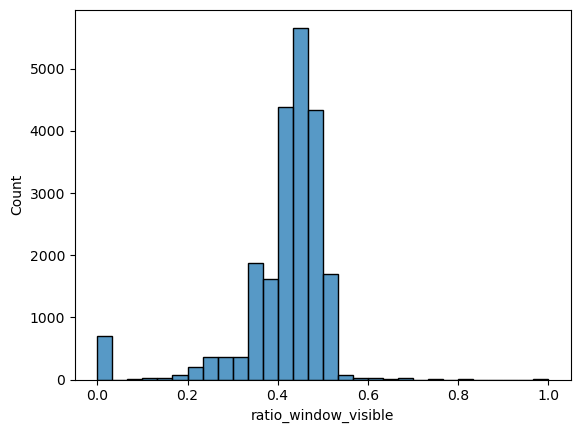

In [ ]:
# visualize ratio_window_visible column
sns.histplot(data=df, x='ratio_window_visible', bins=30)

<AxesSubplot:xlabel='num_review_task', ylabel='Count'>

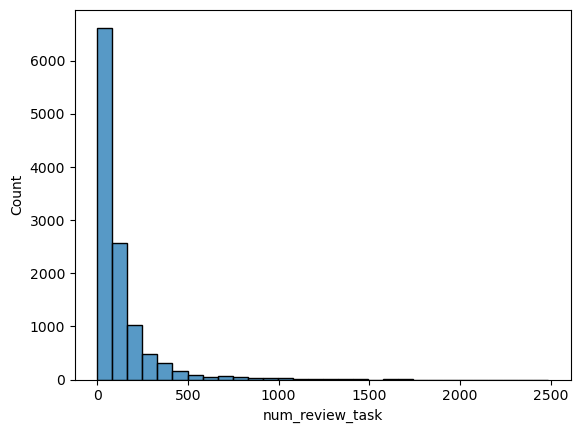

In [ ]:
sns.histplot(data=df[df.num_open_feedback > 0], x='num_review_task', bins=30)

*Your discussion/interpretation goes here*

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

3.8377652147320607
MI is:  [2.57408803]


/Users/aybarsyazici/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


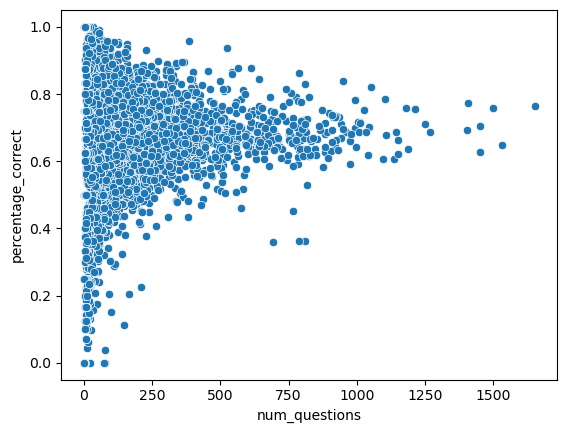

In [ ]:
# using df create a scatter plot of num_events vs percentage_correct
df_without_0percent = df[df.num_events > 0]

sns.scatterplot(data=df_without_0percent, x='num_questions', y='percentage_correct')

print(mutual_info_score(df_without_0percent.num_questions, df_without_0percent.percentage_correct))

x = np.array(df_without_0percent['num_questions']).reshape(-1,1)
y = np.array(df_without_0percent['percentage_correct']).ravel()

mi = mutual_info_regression(x, y, n_neighbors=1)
print("MI is: ", mi)

3.0758734078782064
MI is:  [0.07120082]


/Users/aybarsyazici/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


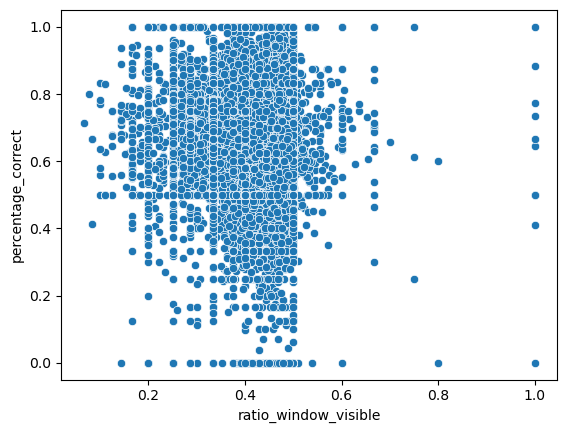

In [ ]:
# using df create a scatter plot of num_events vs percentage_correct
df_without_0percent = df[(df.ratio_window_visible > 0) & (df.num_events > 0) & (df.num_questions > 0)]
sns.scatterplot(data=df_without_0percent, x='ratio_window_visible', y='percentage_correct')

print(mutual_info_score(df_without_0percent.ratio_window_visible, df_without_0percent.percentage_correct))

x = np.array(df_without_0percent['ratio_window_visible']).reshape(-1,1)
y = np.array(df_without_0percent['percentage_correct']).ravel()

mi = mutual_info_regression(x, y, n_neighbors=1)
print("MI is: ", mi)

2.858508459119591
MI is:  [0.53634105]


/Users/aybarsyazici/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


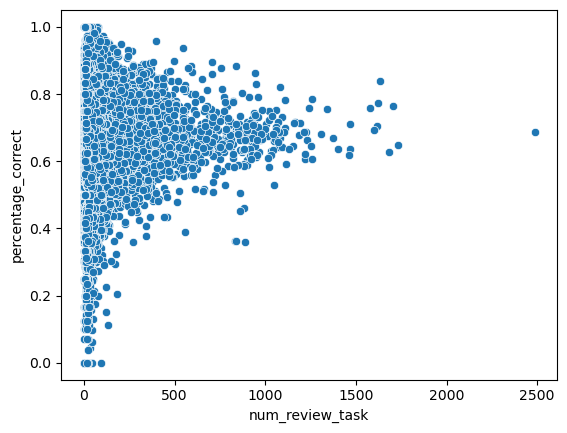

In [ ]:
# using df create a scatter plot of open_feedback vs percentage_correct
df_without_0percent = df[(df.num_events > 0) & (df.num_questions > 0)]
sns.scatterplot(data=df_without_0percent, x='num_review_task', y='percentage_correct')

print(mutual_info_score(df_without_0percent.num_review_task, df_without_0percent.percentage_correct))

x = np.array(df_without_0percent['num_review_task']).reshape(-1,1)
y = np.array(df_without_0percent['percentage_correct']).ravel()

mi = mutual_info_regression(x, y, n_neighbors=1)
print("MI is: ", mi)

*Your discussion/interpretation goes here*

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered **per week**(hint: action event = submit answer).

- **num_events**: total number of events of the student per week.

- **percentage_correct**: number of correct answers/total number of answers  **per week** (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

- **num_reading**: total number of theory reading events **per week** (hint: action event = go to theory).

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps.

Hint 2: Be mindful that week 1 in 2022 is a different week from week 1 in 2023.

You can limit the number of weeks to 10, i.e. for each user we just look at the first 10 weeks of data.
You may change and justify your choice for the number of weeks.

In [ ]:
import datetime as dt

In [ ]:
# In the transactions table for each user find the earliest transaction date
new_transactions = transactions[['user_id','start_time','transaction_token','evaluation']]
new_events = events[['transaction_token','action']]
new_transactions = new_transactions.merge(new_events, on='transaction_token', how='left')
new_transactions["start_time"] = pd.to_datetime(new_transactions["start_time"])

In [ ]:
# For each user find the earliest transaction date
earliest_transaction = new_transactions.groupby('user_id').start_time.min().reset_index()
# rename the column to min_start_time
earliest_transaction = earliest_transaction.rename(columns={'start_time': 'min_start_time'})

In [ ]:
earliest_transaction

,user_id,min_start_time
0,387604,2021-05-22 05:12:11.249
1,387605,2021-05-27 06:46:53.187
2,387608,2021-09-05 08:30:22.422
3,387613,2022-09-19 12:14:39.164
4,387615,2021-08-31 11:10:29.061
...,...,...
22465,431999,2023-02-03 14:11:33.934
22466,432001,2023-02-03 14:11:23.928
22467,432014,2023-02-03 14:11:34.444
22468,432016,2023-02-03 14:13:29.846


In [ ]:
# Merge this to new_transaction table
new_transactions = new_transactions.merge(earliest_transaction, on='user_id', how='left')
new_transactions

,user_id,start_time,transaction_token,evaluation,action,min_start_time
0,387604,2021-05-22 05:12:11.249,09afa151-ee87-4dbe-bb9e-7bef6b92102d,NaN,VIEW_QUESTION,2021-05-22 05:12:11.249
1,387604,2021-05-28 13:03:40.378,65e13251-bb45-4352-8e84-e06943eabe57,NaN,VIEW_QUESTION,2021-05-22 05:12:11.249
2,387604,2021-07-02 08:11:13.122,d471b18d-8aec-45e8-a92e-6a2405ad700f,NaN,VIEW_QUESTION,2021-05-22 05:12:11.249
3,387604,2021-07-02 08:11:13.122,d471b18d-8aec-45e8-a92e-6a2405ad700f,NaN,VIEW_QUESTION,2021-05-22 05:12:11.249
4,387604,2021-07-02 08:11:13.122,d471b18d-8aec-45e8-a92e-6a2405ad700f,NaN,SKIP,2021-05-22 05:12:11.249
...,...,...,...,...,...,...
5366877,432020,2023-02-03 19:56:09.415,ddd425f5-35f2-46e6-b1c6-cb8ec522844a,CORRECT,NEXT,2023-02-03 19:48:10.818
5366878,432020,2023-02-03 19:57:32.160,c166f53c-0edc-4659-9687-ebf1a9f1b3ff,CORRECT,REVIEW_TASK,2023-02-03 19:48:10.818
5366879,432020,2023-02-03 19:57:32.160,c166f53c-0edc-4659-9687-ebf1a9f1b3ff,CORRECT,SUBMIT_ANSWER,2023-02-03 19:48:10.818
5366880,432020,2023-02-03 19:57:32.160,c166f53c-0edc-4659-9687-ebf1a9f1b3ff,CORRECT,NEXT,2023-02-03 19:48:10.818


In [ ]:
# Find how many number of weeks between the earliest transaction and the current transaction, only store the integer part
new_transactions['weeks_since_first_transaction'] = (new_transactions['start_time'] - new_transactions['min_start_time']).dt.days // 7
new_transactions

,user_id,start_time,transaction_token,evaluation,action,min_start_time,weeks,weeks_since_first_transaction
0,387604,2021-05-22 05:12:11.249,09afa151-ee87-4dbe-bb9e-7bef6b92102d,NaN,VIEW_QUESTION,2021-05-22 05:12:11.249,0.000000,0
1,387604,2021-05-28 13:03:40.378,65e13251-bb45-4352-8e84-e06943eabe57,NaN,VIEW_QUESTION,2021-05-22 05:12:11.249,0.857143,0
2,387604,2021-07-02 08:11:13.122,d471b18d-8aec-45e8-a92e-6a2405ad700f,NaN,VIEW_QUESTION,2021-05-22 05:12:11.249,5.857143,5
3,387604,2021-07-02 08:11:13.122,d471b18d-8aec-45e8-a92e-6a2405ad700f,NaN,VIEW_QUESTION,2021-05-22 05:12:11.249,5.857143,5
4,387604,2021-07-02 08:11:13.122,d471b18d-8aec-45e8-a92e-6a2405ad700f,NaN,SKIP,2021-05-22 05:12:11.249,5.857143,5
...,...,...,...,...,...,...,...,...
5366877,432020,2023-02-03 19:56:09.415,ddd425f5-35f2-46e6-b1c6-cb8ec522844a,CORRECT,NEXT,2023-02-03 19:48:10.818,0.000000,0
5366878,432020,2023-02-03 19:57:32.160,c166f53c-0edc-4659-9687-ebf1a9f1b3ff,CORRECT,REVIEW_TASK,2023-02-03 19:48:10.818,0.000000,0
5366879,432020,2023-02-03 19:57:32.160,c166f53c-0edc-4659-9687-ebf1a9f1b3ff,CORRECT,SUBMIT_ANSWER,2023-02-03 19:48:10.818,0.000000,0
5366880,432020,2023-02-03 19:57:32.160,c166f53c-0edc-4659-9687-ebf1a9f1b3ff,CORRECT,NEXT,2023-02-03 19:48:10.818,0.000000,0


In [ ]:
# Find the number of transactions for each user for weeks = 0 till 10
num_events_weekly = new_transactions.groupby(['user_id','weeks_since_first_transaction']).action.count().reset_index()
# Rename the column to num_events
num_events_weekly = num_events_weekly.rename(columns={'action': 'num_events'})
num_events_weekly

,user_id,weeks_since_first_transaction,num_events
0,387604,0,2
1,387604,5,21
2,387604,12,2
3,387604,14,29
4,387604,15,5
...,...,...,...
72945,431999,0,31
72946,432001,0,22
72947,432014,0,39
72948,432016,0,18


In [ ]:
# Only consider question answering events (action = 'SUBMIT_ANSWER')
num_questions_weekly = new_transactions[new_transactions.action == 'SUBMIT_ANSWER']
# Count the number of questions for each user for weeks = 0 till 10
num_questions_weekly = num_questions_weekly.groupby(['user_id','weeks_since_first_transaction']).action.count().reset_index()
# Rename column to num_questions
num_questions_weekly = num_questions_weekly.rename(columns={'action': 'num_questions'})
num_questions_weekly

,user_id,weeks_since_first_transaction,num_questions
0,387604,14,1
1,387604,17,4
2,387604,18,2
3,387604,19,1
4,387604,21,1
...,...,...,...
65132,431999,0,4
65133,432001,0,6
65134,432014,0,9
65135,432016,0,5


In [ ]:
# Only consider question answering events that are correct (evaluation = 'CORRECT')
num_correct_weekly = new_transactions[(new_transactions.evaluation == 'CORRECT') & (new_transactions.action == 'SUBMIT_ANSWER')]
# Count the number of correct questions for each user for weeks = 0 till 10
num_correct_weekly = num_correct_weekly.groupby(['user_id','weeks_since_first_transaction']).action.count().reset_index()
# Rename column to num_correct
num_correct_weekly = num_correct_weekly.rename(columns={'action': 'num_correct'})
num_correct_weekly

,user_id,weeks_since_first_transaction,num_correct
0,387604,18,1
1,387604,23,1
2,387604,24,9
3,387604,25,6
4,387604,29,5
...,...,...,...
58075,431999,0,2
58076,432001,0,3
58077,432014,0,6
58078,432016,0,2


In [ ]:
# Only consider question answering events that are correct (evaluation = 'PARTIAL')
num_partial_weekly = new_transactions[(new_transactions.evaluation == 'PARTIAL') & (new_transactions.action == 'SUBMIT_ANSWER')]
# Count the number of correct questions for each user for weeks = 0 till 10
num_partial_weekly = num_partial_weekly.groupby(['user_id','weeks_since_first_transaction']).action.count().reset_index()
# Rename column to num_correct
num_partial_weekly = num_partial_weekly.rename(columns={'action': 'num_partial'})
num_partial_weekly

,user_id,weeks_since_first_transaction,num_partial
0,387604,17,1
1,387604,18,1
2,387604,19,1
3,387604,21,1
4,387604,23,6
...,...,...,...
54987,431988,0,1
54988,431989,0,1
54989,431991,0,1
54990,431999,0,1


In [ ]:
# Merge the three tables together
num_questions_weekly = num_questions_weekly.merge(num_correct_weekly, on=['user_id','weeks_since_first_transaction'], how='left')
num_questions_weekly = num_questions_weekly.merge(num_partial_weekly, on=['user_id','weeks_since_first_transaction'], how='left')
num_questions_weekly.fillna(0, inplace=True)

In [ ]:
# Create new column percentage_correct = (num_correct +0.5*num_partial)/ num_questions
num_questions_weekly['percentage_correct'] = (num_questions_weekly.num_correct + 0.5*num_questions_weekly.num_partial)/num_questions_weekly.num_questions
# Drop the columns num_correct and num_partial
num_questions_weekly = num_questions_weekly.drop(columns=['num_correct','num_partial'])
num_questions_weekly

,user_id,weeks_since_first_transaction,num_questions,percentage_correct
0,387604,14,1,0.000000
1,387604,17,4,0.125000
2,387604,18,2,0.750000
3,387604,19,1,0.500000
4,387604,21,1,0.500000
...,...,...,...,...
65132,431999,0,4,0.625000
65133,432001,0,6,0.500000
65134,432014,0,9,0.666667
65135,432016,0,5,0.600000


In [ ]:
# Only consider theory reading events (action = 'GO_TO_THEORY')
num_reading_weekly = new_transactions[new_transactions.action == 'GO_TO_THEORY']
# Count the number of questions for each user for weeks = 0 till 10
num_reading_weekly = num_reading_weekly.groupby(['user_id','weeks_since_first_transaction']).action.count().reset_index()
# Rename column to num_questions
num_reading_weekly = num_reading_weekly.rename(columns={'action': 'num_reading'})
num_reading_weekly

,user_id,weeks_since_first_transaction,num_reading
0,387604,25,5
1,387604,86,1
2,387605,6,2
3,387605,44,1
4,387615,0,1
...,...,...,...
8174,431880,0,1
8175,431963,0,1
8176,431965,0,1
8177,431972,0,1


In [ ]:
# Create array containing each user_id from users table and each week from 0 to 10
user_id = users.user_id
# print number of users
print(len(user_id))
weeks = np.arange(0,11)
# Find the combination of user_id and weeks the len should be 11*number of users
user_week = np.array(np.meshgrid(user_id, weeks)).T.reshape(-1,2)
print(len(user_week) == 11*len(user_id))
# Create a dataframe from the array
user_week_df = pd.DataFrame(user_week, columns=['user_id','weeks_since_first_transaction'])
user_week_df

30929
True


,user_id,weeks_since_first_transaction
0,387604,0
1,387604,1
2,387604,2
3,387604,3
4,387604,4
...,...,...
340214,432023,6
340215,432023,7
340216,432023,8
340217,432023,9


In [ ]:
# Create the final table
df_weekly = num_events_weekly.merge(num_questions_weekly, on=['user_id','weeks_since_first_transaction'], how='left')
df_weekly = df_weekly.merge(num_reading_weekly, on=['user_id','weeks_since_first_transaction'], how='left')
# Fill the missing user_id, weeks_since_first_transaction with NaN values
df_weekly = user_week_df.merge(df_weekly, on=['user_id','weeks_since_first_transaction'], how='left')
df_weekly

NameError: name 'num_events_weekly' is not defined

#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

*Your discussion goes here*

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



In [ ]:
# Your creative visualization here
print('hello')

*Your discussion goes here*